In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
reviews = pd.read_csv('data/winereviewscsv.csv', index_col=0)
reviews.info()
np.random.seed(42)
mask = np.random.rand(reviews.shape[0]) > 0.7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [3]:
reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


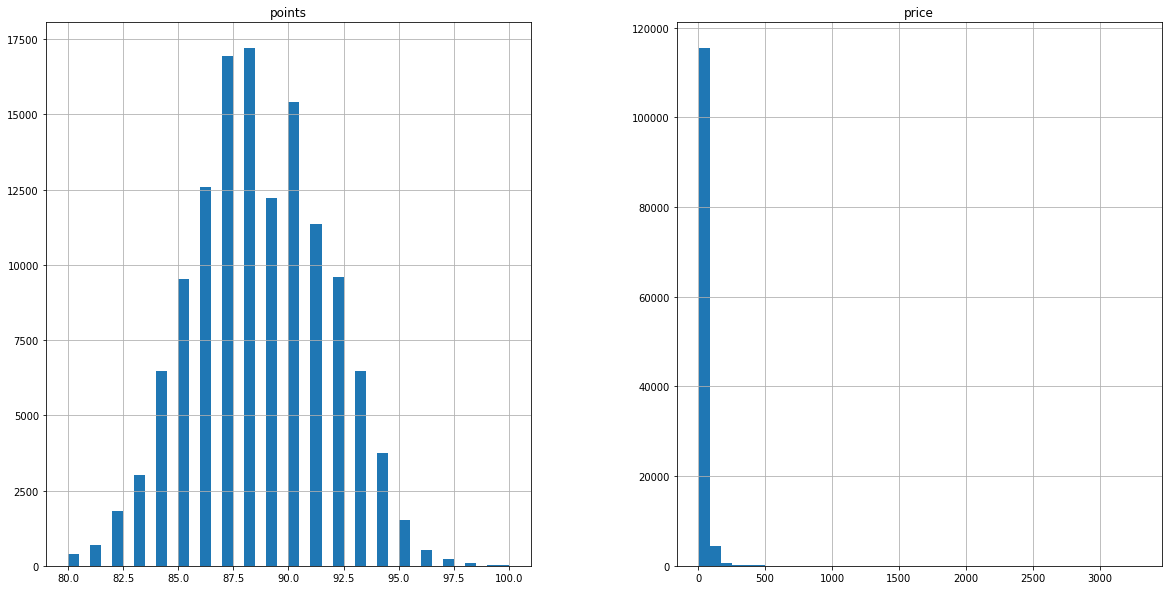

In [4]:
reviews.hist(bins=40, figsize=(20,10))
plt.show()

In [5]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Provincijų grafikas

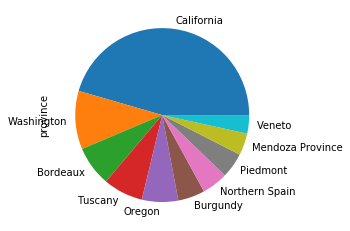

In [6]:
reviews['province'].value_counts().head(10).plot.pie()

import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

# Tasku grafikas

In [7]:

def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points histogram')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()


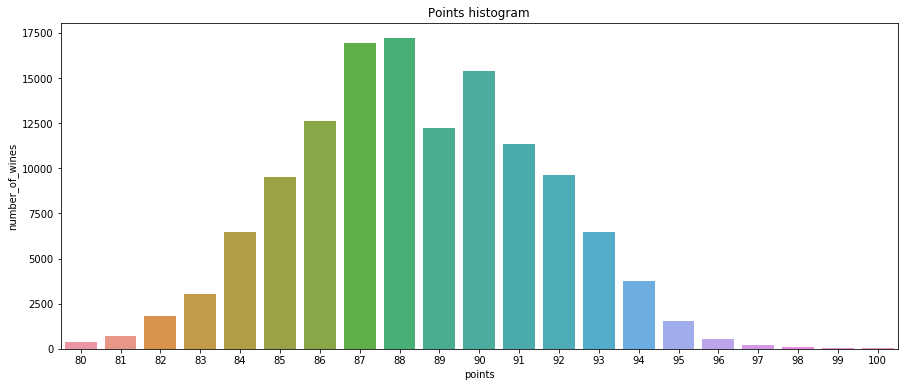

In [8]:
temp = reviews["points"].value_counts()
df = pd.DataFrame({'points': temp.index,
                   'number_of_wines': temp.values
                  })

pastel_plot(df,'points', 'number_of_wines')

# Kurios šalies vynai pelno daugiausiai taškų?

In [9]:
z=reviews.groupby(['country']).mean().reset_index().sort_values('price',ascending=False)
z=z.sort_values('points', ascending=False)
z[['country','points']].head(10)

,country,points
14,England,91.581081
20,India,90.222222
3,Austria,90.101345
17,Germany,89.851732
7,Canada,89.369650
19,Hungary,89.191781
9,China,89.000000
15,France,88.845109
24,Luxembourg,88.666667
2,Australia,88.580507


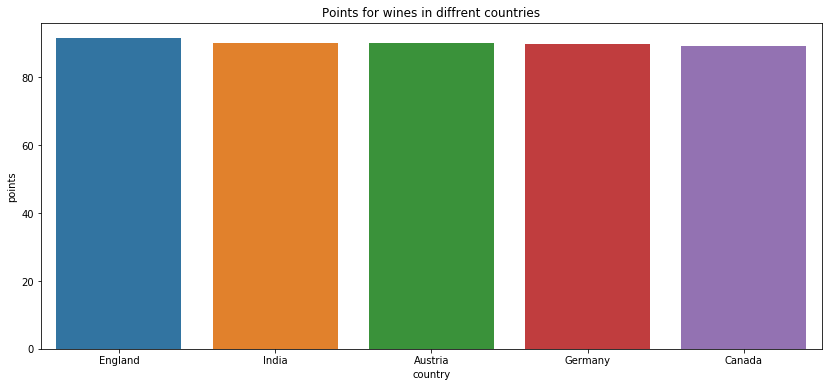

In [10]:
plt.figure(figsize = (14,6))
plt.title('Points for wines in diffrent countries')
sns.set_color_codes("pastel")
sns.barplot(x = 'country', y="points", data=z.head(5))
locs, labels = plt.xticks()
plt.show()


Pažiūrėkime kiek vynų dataset'e yra iš skirtingų šalių

US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
New Zealand      1419
South Africa     1401
Israel            505
Greece            466
Canada            257
Hungary           146
Bulgaria          141
Romania           120
Uruguay           109
Turkey             90
Name: country, dtype: int64

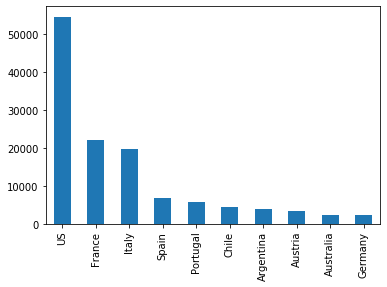

In [11]:
country=reviews['country'].value_counts()
country.head(10).plot.bar()
country.head(20)

Matome, kad Anglija nepatenka i 20-uka - panagrinekime kainos/kokybes faktoriu


In [12]:
z['quality/price']=z['points']/z['price']
z.sort_values('quality/price', ascending=False)[['country','quality/price']]

,country,quality/price
41,Ukraine,9.124031
4,Bosnia and Herzegovina,6.920000
20,India,6.766667
1,Armenia,6.034483
6,Bulgaria,6.004358
32,Romania,5.668671
25,Macedonia,5.572193
34,Slovakia,5.437500
11,Cyprus,5.357542
27,Moldova,5.207490


Matome, kad kainos/kokybes santykiu Anglija lieka priespaskutine sarase